## **Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 

In [2]:
warnings.filterwarnings("ignore")

### **Load Data**

In [3]:
df = pd.read_csv("C:/Users/PC/Desktop/Car-Price-Proyect/data/cars_ohe.csv")

### *Split Data*

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
def load_inputs_outputs():
    
    X = df.drop(["price"],axis = "columns")
    y = df.price
    
    return X,y

In [6]:
X,y = load_inputs_outputs()

In [7]:
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

In [8]:
X_train.shape,X_test.shape

((44299, 119), (11075, 119))

### *Array Transform*

In [9]:
def array(data):
    return np.asarray(data)

In [10]:
X_train,Y_train = array(X_train),array(Y_train)

In [11]:
X_test,Y_test = array(X_test),array(Y_test)

## **Model**

In [12]:
from xgboost import XGBRegressor

In [13]:
params={'gamma': 10,
     'learning_rate': 0.01,
     'max_depth': 7,
     'n_estimators': 1000,
     'random_state': 42,
     'subsample': 0.85,
     'n_jobs':-1}

In [14]:
xgb = XGBRegressor(**params)

In [15]:
xgb.fit(X_train,Y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=10, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.01, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=7, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=1000,
             n_jobs=-1, num_parallel_tree=1, predictor='auto', random_state=42,
             reg_alpha=0, reg_lambda=1, ...)

In [16]:
xgb.score(X_train,Y_train)

0.9659736879480013

In [17]:
xgb.score(X_test,Y_test)

0.959877667150209

### *Metrics*

In [18]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import cross_val_score

In [19]:
class Metrics():

  def __init__(self,pred_train,pred_test):
    self.pred_train = pred_train
    self.pred_test = pred_test


  def MSE(self):

    mse_train = mean_squared_error(Y_train,self.pred_train)
    mse_test = mean_squared_error(Y_test,self.pred_test)

    return mse_train,mse_test


  def MAE(self):

    mse_train = mean_absolute_error(Y_train,self.pred_train)
    mse_test = mean_absolute_error(Y_test,self.pred_test)

    return mse_train,mse_test


  def CrossValidation(self,model,x,y):

    return cross_val_score(model,x,y,cv = 5,n_jobs = -1)

In [20]:
pred_train,pred_test = xgb.predict(X_train),xgb.predict(X_test)

In [21]:
metrics = Metrics(pred_train,pred_test)

In [22]:
mse_train,mse_test = metrics.MSE()
mae_train,mae_test = metrics.MAE()

#### *Mean Square Error*

It measures the average error between the original and the predicted value. This metric is very sensitive when the model offers very distant predictions. But at the same time it offers you a better approach to the performance of the model.

In [23]:
print(f"MSE Train {mse_train}")
print(f"MSE Test {mse_test}")

MSE Train 3051744.4845426655
MSE Test 3672442.6224558135


#### *Mean Aboslute Error*

It is similar to the MSE with the difference that it is very robust with outliers.

In [24]:
print(f"MAE Train {mae_train}")
print(f"MAE Test {mae_test}")

MAE Train 1232.71592213191
MAE Test 1292.600782264038


#### *Cross Validation*

It seeks to obtain the generalization average of the model.

In [25]:
cv = metrics.CrossValidation(xgb,X_test,Y_test)

In [26]:
cv

array([0.94775098, 0.94239008, 0.95086455, 0.93691561, 0.9444738 ])

In [27]:
cv.mean()

0.9444790061713633

## **Opening the Black Box**

### *Most Important Features*

In [118]:
features,feature_importances = X.columns,xgb.feature_importances_

In [119]:
def relevant_features():
    features_list,feature_important_list = list(),list()
    for i,v in enumerate(feature_importances):
        if v >= 0.029782:
            features_list.append(features[i])
            feature_important_list.append(v)
            
    return features_list,feature_important_list

In [120]:
features,feature_importances = relevant_features()

In [121]:
df_features_importance = pd.DataFrame({"Features":features,"Importance":feature_importances})

In [127]:
df_features_importance = df_features_importance.sort_values(by = "Importance",ascending = True)

In [128]:
df_features_importance

,Features,Importance
1,year,0.029782
3,mpg,0.031242
2,engineSize,0.049080
0,Manual,0.408114


In [35]:
sns.set_style("whitegrid")

### *Plot Importance*

In [124]:
def plot_importance(colors):
    
    fig,ax = plt.subplots(1,1,figsize = (20,8))
    
    _ = ax.set_title("Plot Importance")
    _ = plt.barh(df_features_importance["Features"],df_features_importance["Importance"],color = colors)
    plt.savefig("plot_importance.jpeg")

In [138]:
colors = ['#808080', '#e30052','#ff8000','#007fff']

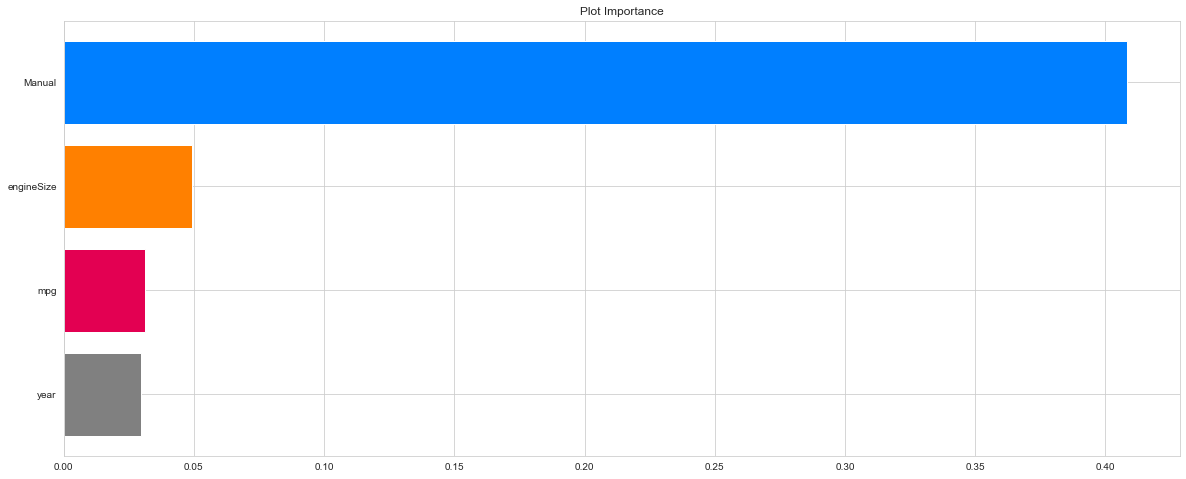

In [139]:
_ = plot_importance(colors)

* If the vehicle has a Manual transmission, the price of the vehicle generally decreases, it is less expensive with an automatic or semi-automatic transmission.



* The engine size is a variable that has a lot of weight. Since the greater the capacity, the greater the technical capacity of the car.



* The MPG in some countries is the main producer, for the purchase of a vehicle. Since there will be people looking for an economical car in terms of fuel consumption.



* The year of manufacture includes in the price, since if a vehicle of the same model. It will make the price of the car more expensive, since it will be a more recent model.




These are the variables that most influence the model. The other variables can help complement the result.



For example, in this list of the most important variables, the mileage variable does not appear. It is well known that generally a vehicle with more mileage tends to lower the price.

## **Predictions**

In [140]:
df_predictions = pd.DataFrame({"True Values":Y_test,"Predicted Values":pred_test})

In [141]:
sns.set_style(style = "whitegrid")

In [142]:
def main():
    
    fig,ax = plt.subplots(1,1,figsize = (20,8))
    sns.scatterplot(data = df_predictions,x = "True Values",y = "Predicted Values",ax = ax,color = "c")
    sns.lineplot(Y_test,Y_test,ax = ax)

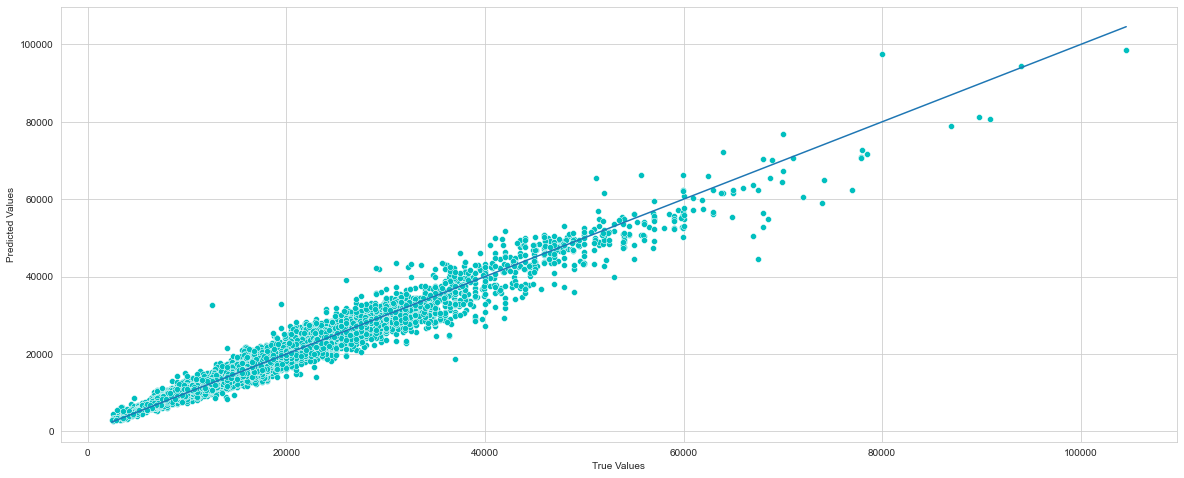

In [143]:
_ = main()

In [144]:
df_predictions.sample(n = 10,random_state = 2020)

,True Values,Predicted Values
9930,12900,12186.975586
4783,19995,19124.804688
10153,19750,19056.869141
5693,11000,12087.282227
11048,11850,10779.148438
1250,9999,9320.934570
8423,18495,16465.187500
1437,13998,13783.101562
7322,11290,12074.627930
3804,9990,10812.479492


As can be seen in both the graph and the dataframe, the model offers predictions very close to the original value.

## *New Predictions*

In [145]:
columns = X.columns

In [146]:
def predict(manufacturer,model,trasmision,year,fuel_type,engineSize,mileage,tax,mpg):
    
    data = np.zeros(len(columns))
    
    manufacturer_idx = np.where(columns == manufacturer)[0][0]
    model_idx = np.where(columns == model)[0][0]
    trasmision_idx = np.where(columns == trasmision)[0][0]
    fuel_type_idx = np.where(columns == fuel_type)[0][0]
    
    data[111] = year
    data[115] = engineSize
    data[116] = mileage
    data[117] = tax
    data[118] = mpg
    
    
    
    if manufacturer_idx >=0:
        data[manufacturer_idx] = 1

    if model_idx >=0:
        data[model_idx] = 1
        
    if trasmision_idx >=0:
        data[trasmision_idx] = 1
        
    if fuel_type_idx >=0:
        data[fuel_type_idx] = 1
        
    data = np.asarray([data])
    
    return xgb.predict(data)

### *Ford Mustang*

<img src = 'https://cdn.carbuzz.com/gallery-images/840x560/617000/300/617330.jpg' height ="100"  width ="600">
    

In [150]:
predict('Ford','Mustang','Automatic',2020,'Petrol',5.0,3500,145,22.01)

array([42365.203], dtype=float32)

### *Toyota Corolla*

<img src = 'https://images.kavak.services/images/30662/toyota-corolla-base2019-frontal-lateral-piloto-lejana-1608341522498.jpg?d=540x310'>

In [151]:
predict('Toyota','Corolla','Manual',2019,'Hybrid',2.0,5000,140,86.23)

array([21687.107], dtype=float32)

### *Hyundi GT86*

<img src = "https://e00-marca.uecdn.es/assets/multimedia/imagenes/2016/03/19/14583947669790.jpg" height = "600" width = "600">

In [152]:
predict('Hyundi','GT86','Manual',2016,'Petrol',2.0,50000,265,36.2)

array([14738.581], dtype=float32)

### *Audi A6*

<img src = "https://mediaservice.audi.com/media/fast/H4sIAAAAAAAAAFvzloG1tIiBOTrayfuvpGh6-m1zJgaGigIGBgZGoDhTtNOaz-I_2DhCHkCFmZQZWMpTkwoYgSrcmLgycxPTU_VBArz____nZ-RONNNNrSjRzUvNzWcHKhHkOb-ibkWM-qErHf7vJx24fn7uNOll1Qw833LNLySudV57OLXeI96WVUX5mNALBp5asf1a0768mrXrSWyTTPmWHSqVoXMYeOL8QvzWXLq5deKi3KDn-or7fThPeTLw7NJfYSp3q16zSKLhr_Gk9ZNr02qfM_BYPI6SXx0rfDPKXvqsY5aZS9C1V9sYeET0pxzNU9UwClaX6Nvax7Y2-eE7GQYejfM9j15lMnm9qBQ3lZRyVYoO-rCGgWeqrjkPax1f7dLkpcz1j0Qt3yvrz2PgUdvxwXKO5oV6uROCZQxGeQvMVB65MvBcUY1ozPHlk7_6mPPlg1lsjmb9-9kZeOYxftz_577AdIUlkj2vlghLm7y-r8DAc8J9b-X3eV_sudhjzj8XN3gcaMMTy8Czt0LxN0uchcDNJycud_49KZt-3UKQgeevYxGToqOfZnNJ0JeOZqMnygeqkhl4mN691j9lxcaxZOWU_Akbemt2vg8E-m3vzKNXvq4ROqz4TjhxjUHTwaKDu38xsAKjh3EdkGB-ByR4XYAEx0EGMAmKOBOQdByIz_qRmYGB24GBgS2EAQT4hEuLcgoSixJz9YpSiwvy84ozy1IFNQyIBMKsPo6RrkEAm9tGnFYCAAA?mimetype=image/png" width = 600>

In [153]:
predict('Audi','A6','Semi-Auto',2018,'Petrol',2.0,30000,150,55.4)

array([22378.328], dtype=float32)

### *Mercedes Benz G Class* 

<img src = 'https://acnews.blob.core.windows.net/imggallery/800x600/GAZ_836767a50d324bec83096120554e734f.jpg' width = 600>

In [154]:
predict('Mercedes-Benz','G Class','Automatic',2016,'Petrol',4.0,20000,325,30.4)

array([59196.305], dtype=float32)

### *BMW X7*

<img src = "https://cdn.motor1.com/images/mgl/lA08g/s1/bmw-x7.jpg" width = 600>

In [155]:
predict('BMW','X7','Semi-Auto',2019,'Diesel',3.0,6000,150,32)

array([69644.33], dtype=float32)

### *Toyota Yaris*

<img src = 'https://www.elcarrocolombiano.com/wp-content/uploads/2018/06/20180608-TOYOTA-YARIS-2019-BRASIL-01.jpg' width = 600>

In [156]:
predict('Toyota','Yaris','Manual',2019,'Hybrid',1.5,15000,140,76.3)

array([11853.546], dtype=float32)

### *Ford Focus*

<img src = "https://noticias.coches.com/wp-content/uploads/2014/07/ford_focus-3door-2008_r6.jpg" width = 600>

In [157]:
predict('Ford','Focus','Manual',2008,'Petrol',1.6,50000,20,68)

array([4882.4873], dtype=float32)

### *Save Model*

We save it in JSON format in order to make the model run faster.In addition, we save the installation of more libraries in the file requirements.txt.

In [158]:
xgb.save_model("C:/Users/PC/Desktop/Car-Price-Proyect/app/xgb_price.json")

### *Save JSON File*

We create a JSON file with the name of the input variables. In order to facilitate the preprocessing of new data data. Since the categorical variables such as the Transmission Model are in One Hot Encoding format.

In [159]:
import json

In [160]:
columns = {"data_column":[col for col in columns]}

In [162]:
with open("C:/Users/PC/Desktop/Car-Price-Proyect/app/columns.json","w") as F:

    F.write(json.dumps(columns))